**clustering algorithms**: seek to learn from properties of data, an optimal division or discrete labeling of groups of points

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

**how k-mean algo define optimal clustering**: 
1. "cluster center" is the arithmetic mean of all points to cluster
2. each point is closer to its owen cluster than to other cluster centers

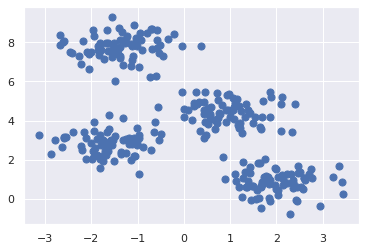

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

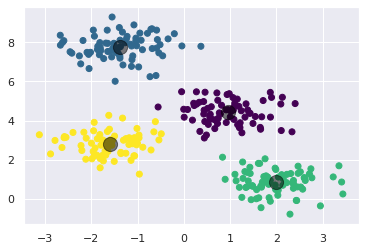

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# How K-Means find the centers: Expectation-Maximization
1. Guess cluster centers
2. Pepeated until converges  
    a. E-step: assign points to nearest cluster center  
    b. M-step: set the cluster centers to the mean

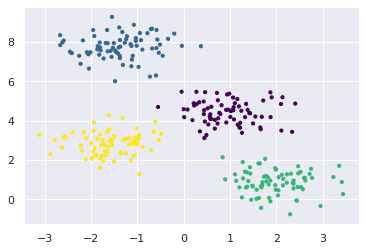

In [11]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=2):
    #1. randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. assign labels based on closet center
        labels = pairwise_distances_argmin(X, centers) 
        #Compute minimum distances between one point and a set of points.
        
        # 2b. find new centers from mean of points
        new_centers = np.array([X[labels == i].mean(0)
                               for i in range(n_clusters)])
        
        # 2c. check for convergence
        if np.all(centers == new_centers):
            # Test whether all array elements along a given axis evaluate to True.
            break
        centers = new_centers
    return centers, labels
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis')

# Caveats
1. globally optimal result may not be acheived, eg:

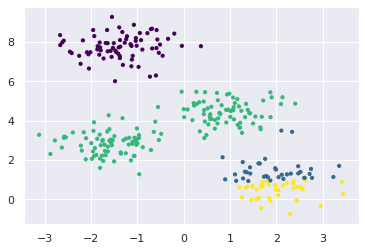

In [19]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis')

2. the number of clusters must be selected beforhand, eg:

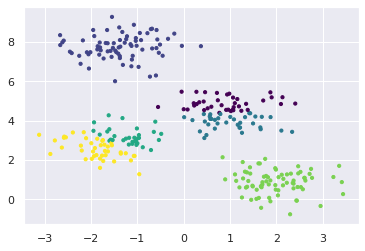

In [20]:
centers, labels = find_clusters(X, 6)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis')

3. k-means is limited to linear cluster boundaries

In [21]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

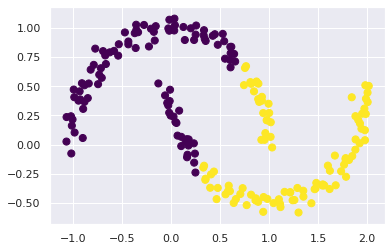

In [23]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
           s=50, cmap='viridis')

however, we may use to kernel function to address this issue

/home/jianyan/.conda/envs/trade-bot/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


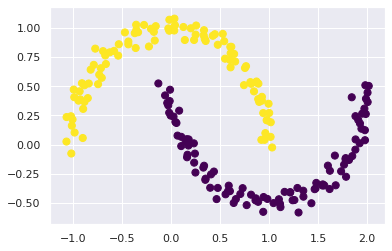

In [25]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                          assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
           s=50, cmap='viridis')

4. k-means can be slow for large numbers of samples  
Each iteration we iterate through all points  
Soln: each time use a subset of data to update cluster center